<a href="https://colab.research.google.com/github/Juanxtron/Proyecto-2/blob/main/Proyecto_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
%pip install xlrd

# Especifica la ruta de tu archivo Excel
ruta_excel = '/content/drive/MyDrive/Copia de default of credit card clients.xls'

# Lee el archivo Excel en un DataFrame de pandas
datos_excel = pd.read_excel(ruta_excel, sheet_name="Data")

datos_excel.columns = datos_excel.iloc[0]

# Elimina la primera fila, ya que ahora son los nombres de las columnas
datos_excel = datos_excel[1:]


import pandas as pd

# Supongamos que 'df' es tu DataFrame
# df = pd.read_excel("ruta/a/tu/archivo.xlsx")

# Verifica si hay valores faltantes en cada columna
valores_faltantes_por_columna = datos_excel.isna().sum()

# También puedes usar df.isnull().sum() para el mismo propósito

import pandas as pd

# Supongamos que 'datos_excel' es tu DataFrame
# datos_excel = pd.read_excel("ruta/a/tu/archivo.xlsx")

# Eliminar filas con valores atípicos en la columna "EDUCATION"
datos_excel = datos_excel[datos_excel['EDUCATION'].isin([1, 2, 3, 4])]

# Eliminar filas con valores atípicos en la columna "MARRIAGE"
datos_excel = datos_excel[datos_excel['MARRIAGE'].isin([1, 2, 3])]

# Reindexar el DataFrame si es necesario
datos_excel.reset_index(drop=True, inplace=True)

# Cambiar el nombre de la columna "PAY_0" a "PAY_1"
datos_excel = datos_excel.rename(columns={"PAY_0": "PAY_1"})

# Convertir todas las columnas a tipos de datos numéricos
datos_excel = datos_excel.apply(pd.to_numeric, errors='coerce')


# Lista de valores permitidos
#valores_permitidos = [0,-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Contador para el total de filas con valores atípicos
#total_filas_atipicas = 0

# Verificar valores fuera de los límites en las columnas PAY_0 a PAY_6
#for columna in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    # Eliminar filas con valores atípicos en la columna
    #datos_excel = datos_excel[datos_excel[columna].isin(valores_permitidos)]


for columna in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    # Reemplazar el valor 0 por -1 en la columna
    datos_excel[columna] = datos_excel[columna].replace(0, -1)

# Mapeo para las variables categóricas
mapeo_sex = {1: 'Male', 2: 'Female'}
mapeo_education = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}
mapeo_marriage = {1: 'Married', 2: 'Single', 3: 'Others'}

# Reemplazar los valores en las variables categóricas con su representación de texto
datos_excel['SEX'] = datos_excel['SEX'].replace(mapeo_sex)
datos_excel['EDUCATION'] = datos_excel['EDUCATION'].replace(mapeo_education)
datos_excel['MARRIAGE'] = datos_excel['MARRIAGE'].replace(mapeo_marriage)

mapeo__pay= {-1: 'pay duly;',1: 'payment delay for one month', 2: 'payment delay for two month', 3: 'payment delay for three month',4: 'payment delay for four month',5: 'payment delay for fife month',6: 'payment delay for six month',7: 'payment delay for seven month',8: 'payment delay for eigth month',9: 'payment delay for nine month'}

for columna in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    datos_excel[columna] = datos_excel[columna].replace(mapeo__pay)



df = pd.DataFrame(datos_excel)

# Convertir variables categóricas en variables dummy
df_dummies = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

# Convertir todas las columnas a tipos de datos numéricos
df_dummies = df_dummies.astype(int)


print(df_dummies)






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.2 MB/s eta 0:00:00
          ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1      20000   24       3913       3102        689          0   
1          2     120000   26       2682       1725       2682       3272   
2          3      90000   34      29239      14027      13559      14331   
3          4      50000   37      46990      48233      49291      28314   
4          5      50000   57       8617       5670      35835      20940   
...      ...        ...  ...        ...        ...        ...        ...   
29596  29996     220000   39     188948     192815     208365      88004   
29597  29997     150000   43       1683       1828       3502       8979   
29598  29998      30000   37       3565       3356       2758      20878   
29599  29999      80000   41      -1645      78379      76304      52774   
29600  30000      50000   46      47929      48905      49764      36535   

       

In [ ]:
# Importar las librerías necesarias
import tensorflow as tf
import numpy as np
from tensorflow import keras
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# split into X and Y
Y = df_dummies['default payment next month']
X = df_dummies.drop(['default payment next month'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

(29601, 82)
(29601,)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42)

# Escalar los datos (opcional, pero es común en redes neuronales)
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

######Ya se cambio la proporción de entrenamiento y prueba. Mirar lo de cross validation como serviria para hallar el numero de neuronas y capas.


[[  6042 300000     32  26575  27062  20111   8738    250      0   1321
    9160   1000    250      0      0      1      0      0      0      0
       1      0      0      1      0      1      0      0      0      0
       0      0      0      0      0      1      0      0      0      0
       0      0      0      0      0      1      0      0      0      0
       0      0      0      0      0      1      0      0      0      0
       0      0      0      0      0      1      0      0      0      0
       0      0      0      1      0      0      0      0      0      0
       0      0]
 [ 21537  30000     22  11222  11738  13255  14380  14081  10796   1000
    2000   1670    551      0    500      1      0      0      0      0
       1      0      0      1      0      1      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      1      0      0      0      0      0      0
       0      0      0      1      0      0    

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import itertools
tf.keras.backend.clear_session()
# Definir los datos de entrenamiento y validación (X_train, X_valid, y_train, y_valid)
# Supongamos que ya están definidos

# Definir la configuración de hiperparámetros a explorar
hidden_layers = [1, 2, 3]  # Cantidad de capas ocultas
neurons_per_layer = [16, 32, 64]  # Número de neuronas por capa
optimizers = ['RMSPROP', 'ADAM', 'NADAM']  # Tipos de optimizadores

# Inicializar un diccionario para almacenar los resultados
results = {}

# Iterar sobre las combinaciones de hiperparámetros
for num_layers, num_neurons, optimizer in itertools.product(hidden_layers, neurons_per_layer, optimizers):
    # Crear modelo
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(82,), activation="relu"))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar modelo
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=["accuracy"])

    # Entrenar modelo
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        verbose=0)

    # Evaluar modelo en datos de validación
    val_loss, val_accuracy = model.evaluate(X_valid, y_valid)

    # Almacenar los resultados en el diccionario
    results[(num_layers, num_neurons, optimizer)] = {'loss': val_loss, 'accuracy': val_accuracy}

# Encontrar la mejor configuración
best_configuration = min(results, key=lambda x: results[x]['loss'])

print("Mejor configuración:")
print("Número de capas ocultas:", best_configuration[0])
print("Número de neuronas por capa:", best_configuration[1])
print("Optimizador:", best_configuration[2])
print("Loss:", results[best_configuration]['loss'])
print("Accuracy:", results[best_configuration]['accuracy'])



195/195 [==============================] - 0s 2ms/step - loss: 1.5504 - accuracy: 0.7524
Mejor configuración:
Número de capas ocultas: 1
Número de neuronas por capa: 16
Optimizador: RMSPROP
Loss: 0.46708768606185913
Accuracy: 0.8175675868988037


[0.46708768606185913, 0.47830140590667725, 0.5210156440734863, 0.4867107570171356, 0.6164923906326294, 0.5496945977210999, 0.4913559556007385, 0.6108290553092957, 0.5504478216171265, 0.5039532780647278, 0.5028141140937805, 0.5341292023658752, 0.5982045531272888, 0.6372437477111816, 0.597413182258606, 0.7696338295936584, 1.0374513864517212, 0.9033917784690857, 0.48546302318573, 0.5211971998214722, 0.5303572416305542, 0.6620092988014221, 0.7634449601173401, 0.8210543394088745, 1.424257516860962, 1.5447964668273926, 1.5503751039505005]


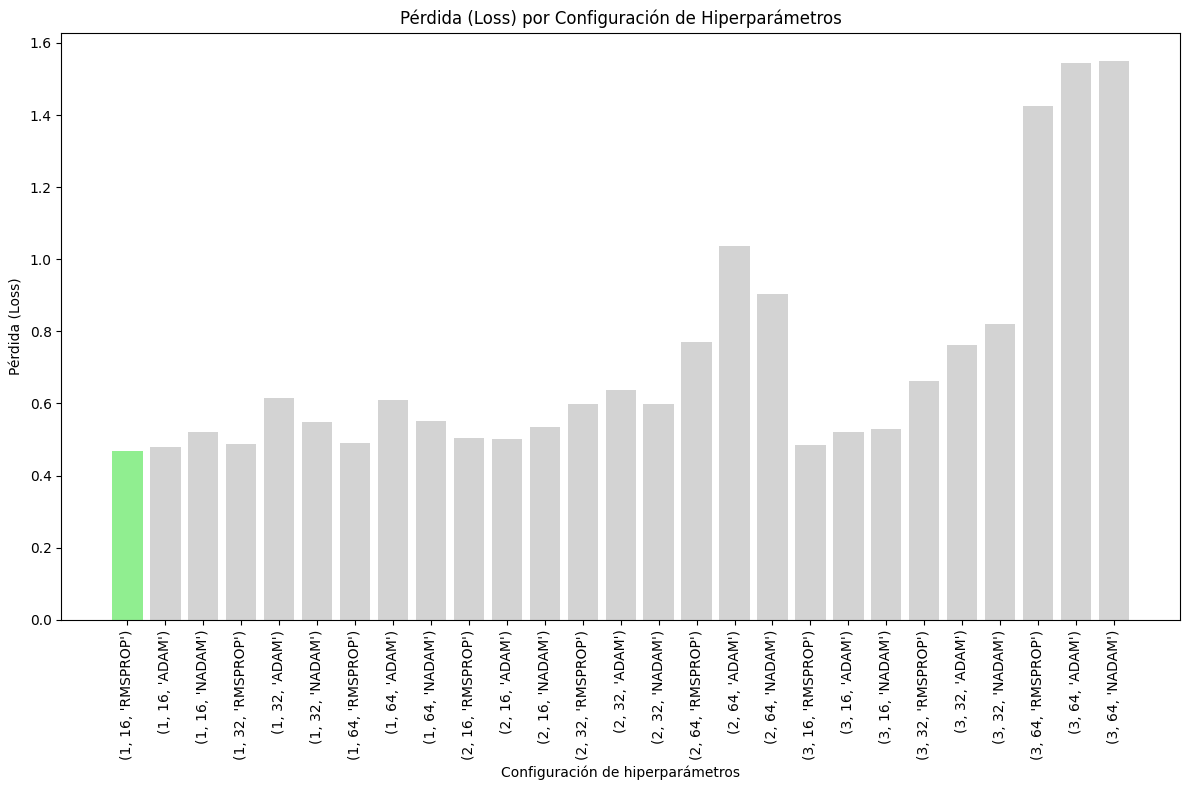

0.4563247859477997


In [ ]:
import matplotlib.pyplot as plt

# Diccionario de resultados (ya definido previamente)
# results = {...}

# Extraer pérdidas (loss) y configuraciones
losses = [results[key]['loss'] for key in results]
configurations = [str(key) for key in results]

# Encontrar la configuración con la menor pérdida
min_loss_index = losses.index(min(losses))
print(losses)
# Crear lista de colores para las barras
colors = ['lightgrey'] * len(losses)
colors[min_loss_index] = 'lightgreen'

# Crear gráfico de barras para pérdidas
plt.figure(figsize=(12, 8))
plt.bar(configurations, losses, color=colors)
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida (Loss) por Configuración de Hiperparámetros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(0.4563247859477997)

[0.8175675868988037, 0.8140283226966858, 0.8141891956329346, 0.8114542961120605, 0.804697573184967, 0.8053410649299622, 0.8103281855583191, 0.8042149543762207, 0.7987451553344727, 0.8106499314308167, 0.8064671754837036, 0.8051801919937134, 0.7921493053436279, 0.7878056764602661, 0.7926319241523743, 0.7939189076423645, 0.7768661379814148, 0.7635135054588318, 0.8130630850791931, 0.7985842823982239, 0.799227774143219, 0.7993886470794678, 0.7799227833747864, 0.7831403017044067, 0.7787966728210449, 0.764800488948822, 0.7524131536483765]


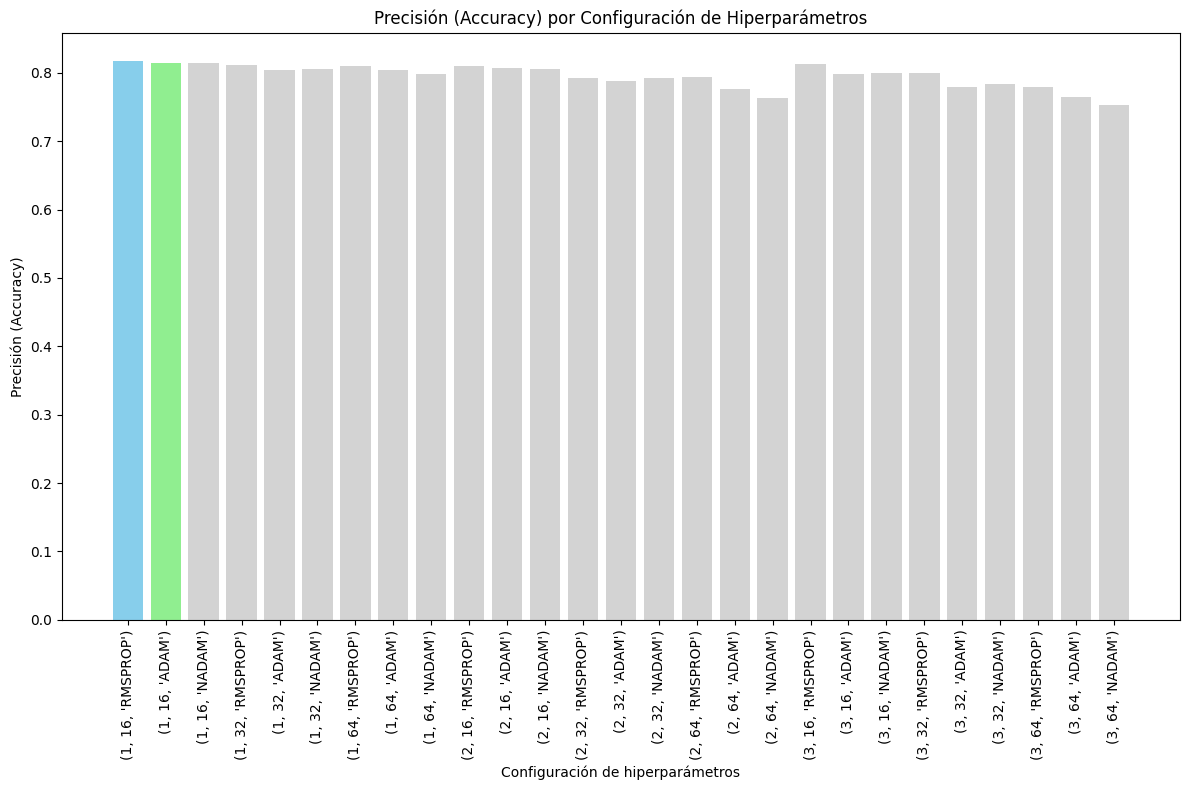

In [ ]:
import matplotlib.pyplot as plt

# Diccionario de resultados (ya definido previamente)
# results = {...}

# Extraer accuracies y configuraciones
accuracies = [results[key]['accuracy'] for key in results]
configurations = [str(key) for key in results]

# Encontrar el índice del máximo accuracy
max_accuracy_index = accuracies.index(max(accuracies))
print(accuracies)

# Encontrar el índice de la combinación (1, 16, 'NADAM')
nadam_index = configurations.index('(1, 16, \'ADAM\')')

# Crear lista de colores para las barras
colors = ['lightgrey'] * len(accuracies)
colors[max_accuracy_index] = 'skyblue'
colors[nadam_index] = 'lightgreen'

# Crear gráfico de barras para accuracies
plt.figure(figsize=(12, 8))
plt.bar(configurations, accuracies, color=colors)
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión (Accuracy) por Configuración de Hiperparámetros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(82,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1328      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSPROP',
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
454/454 [==============================] - 2s 2ms/step - loss: 0.4799 - accuracy: 0.8037 - val_loss: 0.4549 - val_accuracy: 0.8172
Epoch 2/1000
454/454 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8224 - val_loss: 0.4534 - val_accuracy: 0.8190
Epoch 3/1000
454/454 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8237 - val_loss: 0.4536 - val_accuracy: 0.8190
Epoch 4/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.4358 - accuracy: 0.8250 - val_loss: 0.4555 - val_accuracy: 0.8189
Epoch 5/1000
454/454 [==============================] - 2s 3ms/step - loss: 0.4342 - accuracy: 0.8255 - val_loss: 0.4546 - val_accuracy: 0.8163
Epoch 6/1000
454/454 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8263 - val_loss: 0.4542 - val_accuracy: 0.8164
Epoch 7/1000
454/454 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.8263 - val_loss: 0.4562 - val_accuracy:

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

# Define el número de folds para la validación cruzada
k = 5

# Inicializa el validador cruzado
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para almacenar los modelos entrenados y sus historiales
models = []
histories = []

# Lista para almacenar los resultados de cada fold
accuracies = []
losses = []

# Itera sobre cada fold
for train_index, val_index in kf.split(X):
    # Divide los datos en entrenamiento y validación
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = Y[train_index], Y[val_index]

    # Crea un nuevo modelo
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(82,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compila el modelo
    model.compile(loss='binary_crossentropy',
                  optimizer='NADAM',
                  metrics=["accuracy"])

    # Entrena el modelo en este fold y guarda su historial
    history = model.fit(X_train_fold, y_train_fold, epochs=1000,
                        validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evalúa el modelo en el conjunto de validación de este fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)

    # Guarda el modelo en la lista de modelos entrenados
    models.append(model)

    # Guarda el historial de entrenamiento en la lista de historiales
    histories.append(history)

    # Guarda la precisión y la pérdida en listas
    accuracies.append(val_accuracy)
    losses.append(val_loss)

# Calcula la precisión y la pérdida promedio de todos los folds
mean_accuracy = np.mean(accuracies)
mean_loss = np.mean(losses)

print("Mean Validation Accuracy:", mean_accuracy)
print("Mean Validation Loss:", mean_loss)


185/185 [==============================] - 0s 1ms/step - loss: 1.5089 - accuracy: 0.7801
Mean Validation Accuracy: 0.7766967654228211
Mean Validation Loss: 1.3783718347549438


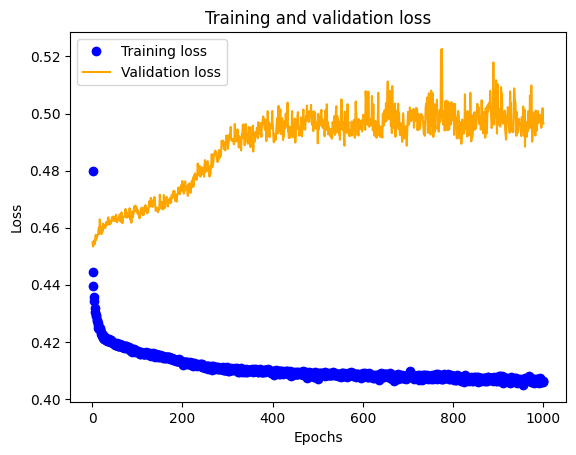

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

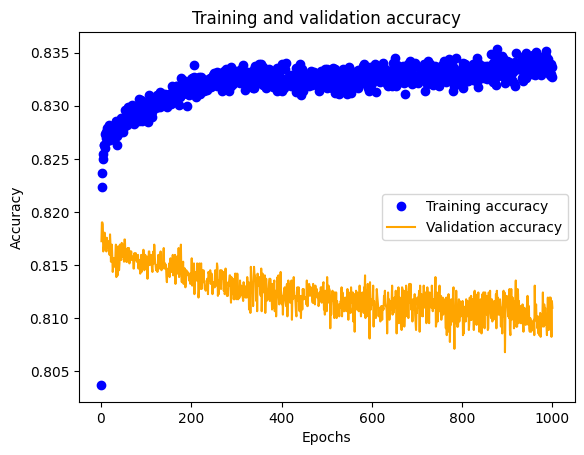

0.8190154433250427

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1?
model.predict(X_test) # prob of successes (survival)
np.round(model.predict(X_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))
##               precision    recall  f1-score   support
##
##            0       0.82      0.89      0.86       549
##            1       0.80      0.69      0.74       340
##
##     accuracy                           0.82       889
##    macro avg       0.81      0.79      0.80       889
## weighted avg       0.81      0.82      0.81       889

278/278 [==============================] - 1s 3ms/step
[[6491  368]
 [1336  686]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6859
           1       0.65      0.34      0.45      2022

    accuracy                           0.81      8881
   macro avg       0.74      0.64      0.67      8881
weighted avg       0.79      0.81      0.78      8881



In [ ]:
# Guardar el modelo en Google Drive
model.save('/content/drive/My Drive/riesgo_credito_usando30_continuos.keras')